### We analyze the relationship of dces and pure cosine similarity

In [50]:
import os
from pretrain.data.visualcomet_preparetion.dataset_preparetion import ImgPostivePairs
import math
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

VCR_IMAGES_DIR = '/ibex/scratch/mag0a/Github/visual-comet/data/vcr1images'# os.environ['VCR_PARENT_DIR']
VCR_FEATURES_DIR = '/ibex/scratch/mag0a/Github/visual-comet/data/features'
record_cache = '/ibex/scratch/mag0a/Github/VL-BERT/pretrain/data/visualcomet_preparetion/cache/event_similarity_cleaned'

split='train'

img_pairs = ImgPostivePairs(split=split, cache=record_cache, load_cache=True)
cosine_img_pairs = ImgPostivePairs(split=split, cache=record_cache, load_cache=True, simi_trick='cosine')
len_events = 111796

In [52]:
f = lambda a,b: len(np.intersect1d(a, b))

def overlap(cosine_sim, dcbs_sim, k):
    index_consine = cosine_sim.topk(k, dim=1, largest=True)[1]
    index_dcbs = dcbs_sim.topk(k, dim=1, largest=True)[1]

    return list(map(f, index_consine.cpu().numpy(), index_dcbs.cpu().numpy()))

sum_overlap = np.zeros((10, 10))
bs = 64
for i in tqdm(range(0, len_events, bs), "Positive"):
    samples = torch.arange(i, min(i+bs, len(event_embeddings)))
    cosine_sim = cosine_img_pairs.event_based_similarity(samples)
    dcbs_sim = img_pairs.event_based_similarity(samples)
    for k in range(10):
        tmp_list = overlap(cosine_sim, dcbs_sim, k+1)
        for j in range(k+1):
            sum_overlap[k][9-j] += tmp_list.count(j+1)
    
np.save('sum_overlap.npy', sum_overlap)

Positive: 100%|██████████| 1747/1747 [07:21<00:00,  3.96it/s]


In [56]:
sum_overlap = np.load('sum_overlap.npy')
ratio =  np.around(sum_overlap.T/len_events, 2)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


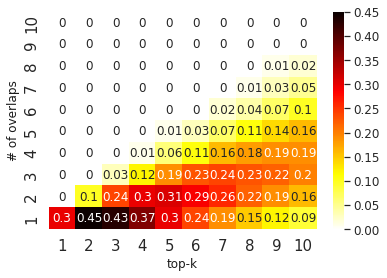

In [57]:
sns.set(font_scale=1.5)
plt.rc('font', family='Times New Roman', size=12)
df = pd.DataFrame(ratio, columns=[str(x) for x in range(1, 11)], index=[str(x) for x in range(10, 0, -1)])
ax = sns.heatmap(df, annot=True, cmap='hot_r')
plt.xlabel('top-k',fontsize=12, color='k') #x轴label的文本和字体大小
plt.ylabel('# of overlaps',fontsize=12, color='k') #y轴label的文本和字体大小
plt.xticks(fontsize=15) #x轴刻度的字体大小（文本包含在pd_data中了）
plt.yticks(fontsize=15) #y轴刻度的字体大小（文本包含在pd_data中了）
# plt.title('title',fontsize=8) #图片标题文本和字体大小
cax = plt.gcf().axes[-1] 
cax.tick_params(labelsize=12)

plt.savefig('dces_analysis.png', dpi=300, bbox_inches = 'tight')
plt.show()


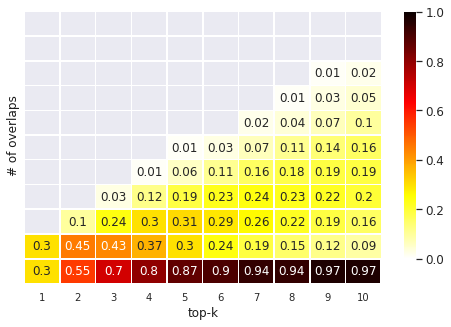

In [123]:
df = pd.DataFrame(ratio, columns=[str(x) for x in range(1, 11)], index=[str(x) for x in range(10, 0, -1)])
df_sum = pd.DataFrame([ratio.sum(0)], columns=[str(x) for x in range(1, 11)], index=[1])

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,5))
gs = GridSpec(110, 100, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure
ax1 = fig.add_subplot(gs[0:100, 0:100])
ax2 = fig.add_subplot(gs[100:110, 0:80])

sns.set(font_scale=1)
plt.rc('font', family='Times New Roman', size=12)


ax = sns.heatmap(df, annot=True, linewidths=0.5, cmap='hot_r', ax=ax1, vmin=0, vmax=1, mask=(ratio==0), yticklabels=False)
ax = sns.heatmap(df_sum, annot=True, linewidths=0.5, cmap='hot_r', ax=ax2, cbar=False, vmin=0, vmax=1, yticklabels=False)

ax2.set_xlabel('top-k',fontsize=12, color='k') #x轴label的文本和字体大小
ax1.set_ylabel('# of overlaps',fontsize=12, color='k') #y轴label的文本和字体大小
plt.xticks(fontsize=10) #x轴刻度的字体大小（文本包含在pd_data中了）
plt.yticks(fontsize=10) #y轴刻度的字体大小（文本包含在pd_data中了）
# plt.title('title',fontsize=8) #图片标题文本和字体大小
cax = plt.gcf().axes[-1] 
cax.tick_params(labelsize=12)
plt.savefig('dces_analysis.png', dpi=300, bbox_inches = 'tight')

plt.show()
